**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**Data Collection and Preprocessing**

In [3]:
# importing the csv data to a pandas DataFrame
gold_data = pd.read_csv('D:\Gold_price_prediction\gld_price_data.csv')

In [4]:
# Print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# Number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting some basic information about the data.
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# cheking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation**
1.Positive Correlation
2.Negative Correlation

In [11]:
correlation = gold_data.corr()

<AxesSubplot:>

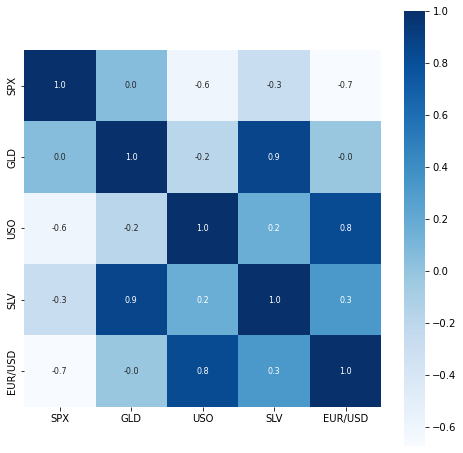

In [15]:
# constructing a heatmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True, square = True, fmt = '.1f',annot = True,annot_kws = {'size':8},cmap = 'Blues')

In [16]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Netizens\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

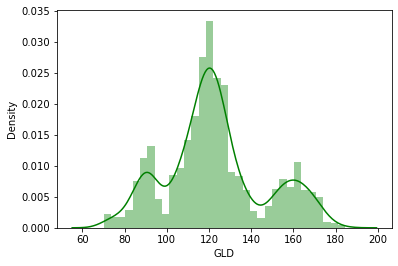

In [17]:
# check the  distribution of the gold price 
sns.distplot(gold_data['GLD'],color = 'green')

**spliting the Features and Target**

In [19]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [22]:
# Splitting Training  data and Test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 2)

**Model Training : Random Forest Regressor**

In [23]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [24]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.5652987   81.61300026 115.90460034 127.66640073 120.6532009
 154.69029751 150.47899764 126.1473001  117.44149882 126.12350031
 116.64290114 171.68200089 141.62939855 167.69789821 115.06339995
 117.68870033 137.77220368 170.40430105 159.46210291 158.64239996
 155.13019981 125.39549978 176.28149911 157.77490373 125.30660057
  93.77769975  76.84310026 120.63990007 119.13369933 167.49709991
  88.33270035 125.3736002   91.11440075 117.61430044 121.17619896
 136.2215006  115.46920124 115.22770093 147.46779939 107.30310101
 104.2091025   87.17169803 126.61720008 118.01090002 153.64479875
 119.73230024 108.31500004 108.13879827  93.10220025 127.12119795
  74.97040069 113.6125988  121.13860016 111.43169919 118.89709883
 120.9485992  159.38970039 167.91620136 146.91269699  85.73009855
  94.44920035  86.7820989   90.45240026 119.04670067 126.46730045
 127.5067001  169.5714996  122.31679914 117.45149861  98.59690008
 168.6281024  143.32599861 132.37780241 121.3343023  120.62509958
 119.746600

In [26]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.9893720722177375


**Compare the Actual values and Predicted Values in a plot**

In [27]:
Y_test = list(Y_test)

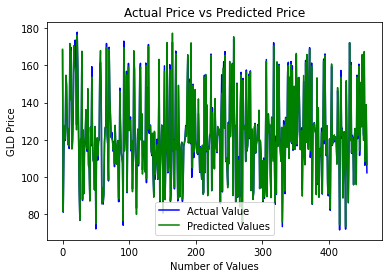

In [28]:
plt.plot(Y_test, color = 'blue',label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()